# <span style="color:green; font-weight:bold;">Analysis of Agricultural Commodity Prices Across Indian Markets</span>

## <span style="color:green; font-weight:bold;">Project Description</span>


This project focuses on performing an in-depth exploratory data analysis (EDA) of agricultural commodity prices across various Indian markets. The dataset captures comprehensive information on commodities, their varieties, grades, market locations, and associated price ranges. Through systematic data preprocessing, cleaning, and visualization, the analysis aims to uncover patterns in price fluctuations, regional disparities, and commodity-specific trends. By applying Python-based analytical tools such as Pandas, Matplotlib, and Seaborn, the study explores how market dynamics influence agricultural pricing across states and seasons. The insights derived from this analysis are expected to enhance understanding of market behavior, support data-driven policymaking, and contribute to improving agricultural price monitoring and management in India.

Data source: data.gov.in

## <span style="color:green; font-weight:bold;">Problem Statement</span>

The objective of this project is to perform a comprehensive analysis of agricultural commodity prices across different markets and states in India. The dataset contains information on various commodities, their varieties, market locations, pricing details, and related characteristics. Through data cleaning, exploratory data analysis (EDA), and visualizations, this project aims to identify:

- Patterns and variations in commodity prices

- State-wise commodity distribution

- Price behavior (minimum, maximum, modal, and average prices)

- Correlations among different price variables

- Commodity-level and variety-level price trends

- Market-level differences in pricing and availability

The analysis helps understand how agricultural prices vary geographically and across commodity types, offering insights that can be useful for stakeholders, farmers, market analysts, and policymakers.

## <span style="color:green; font-weight:bold;">Objective</span>

The objective of the study is to uncover patterns, trends, and disparities in commodity prices across various markets in India



## <span style="color:green; font-weight:bold;">Dataset Description (Before Preprocessing)</span>

This dataset comprises 8,210 rows and 10 columns, representing daily market-level information on agricultural commodities traded across different states in India

| **Column Name**  | **Description**                                                  |
| ---------------- | ---------------------------------------------------------------- |
| **State**        | Name of the Indian state where the market is located             |
| **District**     | Administrative district corresponding to the market              |
| **Market**       | Specific market or mandi where the commodity is traded           |
| **Commodity**    | Type of agricultural commodity (e.g., Tomato, Onion, Rice, etc.) |
| **Variety**      | Specific variety of the commodity sold in the market             |
| **Grade**        | Quality or grading of the commodity (e.g., FAQ, Non-FAQ)         |
| **Arrival_Date** | Date on which the commodity arrived in the market                |
| **Min_Price**    | Minimum recorded price for the commodity on that date            |
| **Max_Price**    | Maximum recorded price for the commodity on that date            |
| **Modal_Price**  | Most frequently traded (modal) price for the commodity           |


In [85]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## <span style="color:green; font-weight:bold;">Import Dataset</span>

In [86]:
df = pd.read_csv('commodity price across markets in india.csv')

## <span style="color:green; font-weight:bold;">Data Inspection</span>

In [87]:
# First few rows
df.head()

State       District               Market              Commodity  \
0  Andhra Pradesh         Guntur  Pidugurala(Palnadu)           Dry Chillies   
1  Andhra Pradesh  West Godavari         Chintalapudi                  Lemon   
2         Gujarat         Amreli             Damnagar  Bhindi(Ladies Finger)   
3         Gujarat        Bharuch              Bharuch            Cauliflower   
4         Gujarat        Bharuch              Bharuch           Green Chilli   

  Variety Grade Arrival_Date  Min_x0020_Price  Max_x0020_Price  \
0     Red   FAQ   06/11/2025            11500            15400   
1   Lemon   FAQ   06/11/2025              700              900   
2  Bhindi   FAQ   06/11/2025             1650             2550   
3   Other   FAQ   06/11/2025             1500             2500   
4   Other   FAQ   06/11/2025             1200             2000   

   Modal_x0020_Price  
0              15100  
1                800  
2               2000  
3               2000  
4               1500

In [88]:
# Rows and Column
df.shape

(8210, 10)

In [89]:
# DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8210 entries, 0 to 8209
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   State              8210 non-null   object
 1   District           8210 non-null   object
 2   Market             8210 non-null   object
 3   Commodity          8210 non-null   object
 4   Variety            8210 non-null   object
 5   Grade              8210 non-null   object
 6   Arrival_Date       8210 non-null   object
 7   Min_x0020_Price    8210 non-null   int64 
 8   Max_x0020_Price    8210 non-null   int64 
 9   Modal_x0020_Price  8210 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 641.5+ KB


## <span style="color:green; font-weight:bold;">Dataset Preprocessing</span>

In [90]:
# Change column names
df.rename(columns={
    'Min_x0020_Price': 'Min_Price_per_Quintal',
    'Max_x0020_Price': 'Max_Price_per_Quintal',
    'Modal_x0020_Price':'Modal_Price_per_Quintal'
},inplace=True)

df.head()

State       District               Market              Commodity  \
0  Andhra Pradesh         Guntur  Pidugurala(Palnadu)           Dry Chillies   
1  Andhra Pradesh  West Godavari         Chintalapudi                  Lemon   
2         Gujarat         Amreli             Damnagar  Bhindi(Ladies Finger)   
3         Gujarat        Bharuch              Bharuch            Cauliflower   
4         Gujarat        Bharuch              Bharuch           Green Chilli   

  Variety Grade Arrival_Date  Min_Price_per_Quintal  Max_Price_per_Quintal  \
0     Red   FAQ   06/11/2025                  11500                  15400   
1   Lemon   FAQ   06/11/2025                    700                    900   
2  Bhindi   FAQ   06/11/2025                   1650                   2550   
3   Other   FAQ   06/11/2025                   1500                   2500   
4   Other   FAQ   06/11/2025                   1200                   2000   

   Modal_Price_per_Quintal  
0                    15100  
1                      800  
2                     2000  
3                     2000  
4                     1500

In [91]:
# Changing data type 
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8210 entries, 0 to 8209
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   State                    8210 non-null   object        
 1   District                 8210 non-null   object        
 2   Market                   8210 non-null   object        
 3   Commodity                8210 non-null   object        
 4   Variety                  8210 non-null   object        
 5   Grade                    8210 non-null   object        
 6   Arrival_Date             8210 non-null   datetime64[ns]
 7   Min_Price_per_Quintal    8210 non-null   int64         
 8   Max_Price_per_Quintal    8210 non-null   int64         
 9   Modal_Price_per_Quintal  8210 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 641.5+ KB


In [92]:
# Null value detection
df.isnull().sum()

State                      0
District                   0
Market                     0
Commodity                  0
Variety                    0
Grade                      0
Arrival_Date               0
Min_Price_per_Quintal      0
Max_Price_per_Quintal      0
Modal_Price_per_Quintal    0
dtype: int64

In [93]:
#duplicates detection
duplicates = df[df.duplicated(subset=['Market','Commodity','Variety','Grade'], keep=False)]
duplicates


Empty DataFrame
Columns: [State, District, Market, Commodity, Variety, Grade, Arrival_Date, Min_Price_per_Quintal, Max_Price_per_Quintal, Modal_Price_per_Quintal]
Index: []

## <span style="color:green; font-weight:bold;">New Columns</span>

In [94]:
# New column with commodity price per kilogram
df['Min_Price (₹/Kg)'] = df['Min_Price_per_Quintal'] / 100
df['Max_Price (₹/Kg)'] = df['Max_Price_per_Quintal'] / 100
df['Modal_Price (₹/Kg)'] = df['Modal_Price_per_Quintal'] / 100

df.head()


State       District               Market              Commodity  \
0  Andhra Pradesh         Guntur  Pidugurala(Palnadu)           Dry Chillies   
1  Andhra Pradesh  West Godavari         Chintalapudi                  Lemon   
2         Gujarat         Amreli             Damnagar  Bhindi(Ladies Finger)   
3         Gujarat        Bharuch              Bharuch            Cauliflower   
4         Gujarat        Bharuch              Bharuch           Green Chilli   

  Variety Grade Arrival_Date  Min_Price_per_Quintal  Max_Price_per_Quintal  \
0     Red   FAQ   2025-06-11                  11500                  15400   
1   Lemon   FAQ   2025-06-11                    700                    900   
2  Bhindi   FAQ   2025-06-11                   1650                   2550   
3   Other   FAQ   2025-06-11                   1500                   2500   
4   Other   FAQ   2025-06-11                   1200                   2000   

   Modal_Price_per_Quintal  Min_Price (₹/Kg)  Max_Price (₹/Kg)  \
0                    15100             115.0             154.0   
1                      800               7.0               9.0   
2                     2000              16.5              25.5   
3                     2000              15.0              25.0   
4                     1500              12.0              20.0   

   Modal_Price (₹/Kg)  
0               151.0  
1                 8.0  
2                20.0  
3                20.0  
4                15.0

In [95]:
# New column with average price
df['Average_Price_per_Quintal'] = (
    df['Max_Price_per_Quintal'] + df['Min_Price_per_Quintal']
) / 2
df.head()

State       District               Market              Commodity  \
0  Andhra Pradesh         Guntur  Pidugurala(Palnadu)           Dry Chillies   
1  Andhra Pradesh  West Godavari         Chintalapudi                  Lemon   
2         Gujarat         Amreli             Damnagar  Bhindi(Ladies Finger)   
3         Gujarat        Bharuch              Bharuch            Cauliflower   
4         Gujarat        Bharuch              Bharuch           Green Chilli   

  Variety Grade Arrival_Date  Min_Price_per_Quintal  Max_Price_per_Quintal  \
0     Red   FAQ   2025-06-11                  11500                  15400   
1   Lemon   FAQ   2025-06-11                    700                    900   
2  Bhindi   FAQ   2025-06-11                   1650                   2550   
3   Other   FAQ   2025-06-11                   1500                   2500   
4   Other   FAQ   2025-06-11                   1200                   2000   

   Modal_Price_per_Quintal  Min_Price (₹/Kg)  Max_Price (₹/Kg)  \
0                    15100             115.0             154.0   
1                      800               7.0               9.0   
2                     2000              16.5              25.5   
3                     2000              15.0              25.0   
4                     1500              12.0              20.0   

   Modal_Price (₹/Kg)  Average_Price_per_Quintal  
0               151.0                    13450.0  
1                 8.0                      800.0  
2                20.0                     2100.0  
3                20.0                     2000.0  
4                15.0                     1600.0

In [96]:
# New column for Average Price (₹/Kg)
df['Average_Price (₹/Kg)'] = (
    df['Min_Price (₹/Kg)'] + df['Max_Price (₹/Kg)']
) / 2
df.head()

State       District               Market              Commodity  \
0  Andhra Pradesh         Guntur  Pidugurala(Palnadu)           Dry Chillies   
1  Andhra Pradesh  West Godavari         Chintalapudi                  Lemon   
2         Gujarat         Amreli             Damnagar  Bhindi(Ladies Finger)   
3         Gujarat        Bharuch              Bharuch            Cauliflower   
4         Gujarat        Bharuch              Bharuch           Green Chilli   

  Variety Grade Arrival_Date  Min_Price_per_Quintal  Max_Price_per_Quintal  \
0     Red   FAQ   2025-06-11                  11500                  15400   
1   Lemon   FAQ   2025-06-11                    700                    900   
2  Bhindi   FAQ   2025-06-11                   1650                   2550   
3   Other   FAQ   2025-06-11                   1500                   2500   
4   Other   FAQ   2025-06-11                   1200                   2000   

   Modal_Price_per_Quintal  Min_Price (₹/Kg)  Max_Price (₹/Kg)  \
0                    15100             115.0             154.0   
1                      800               7.0               9.0   
2                     2000              16.5              25.5   
3                     2000              15.0              25.0   
4                     1500              12.0              20.0   

   Modal_Price (₹/Kg)  Average_Price_per_Quintal  Average_Price (₹/Kg)  
0               151.0                    13450.0                 134.5  
1                 8.0                      800.0                   8.0  
2                20.0                     2100.0                  21.0  
3                20.0                     2000.0                  20.0  
4                15.0                     1600.0                  16.0

## <span style="color:green; font-weight:bold;">Clean the dataset</span>

In [97]:
# Trim whitespace from text columns to avoid hidden spaces
df = df.apply(lambda x:x.str.strip() if x.dtype == "object" else x )

In [98]:
# Standardize text capitalization for categorical columns
text_columns = ['State', 'District', 'Market', 'Commodity', 'Variety']
for col in text_columns:
    df[col] = df[col].str.title()

In [99]:
# Reorder columns for better readability (optional)
df = df[[
    'State', 'District', 'Market', 'Commodity', 'Variety', 'Grade', 'Arrival_Date',
    'Min_Price (₹/Kg)', 'Max_Price (₹/Kg)', 'Modal_Price (₹/Kg)',
    'Average_Price (₹/Kg)','Average_Price_per_Quintal','Min_Price_per_Quintal','Max_Price_per_Quintal','Modal_Price_per_Quintal'
]]

## <span style="color:green; font-weight:bold;">Dataset for action</span>

In [100]:
# Assign cleaned dataframe to a new variable
cleaned_df = df
cleaned_df

State           District               Market  \
0     Andhra Pradesh             Guntur  Pidugurala(Palnadu)   
1     Andhra Pradesh      West Godavari         Chintalapudi   
2            Gujarat             Amreli             Damnagar   
3            Gujarat            Bharuch              Bharuch   
4            Gujarat            Bharuch              Bharuch   
...              ...                ...                  ...   
8205     West Bengal  Paschim Bardhaman             Durgapur   
8206     West Bengal  Paschim Bardhaman             Durgapur   
8207     West Bengal    Purba Bardhaman               Memari   
8208     West Bengal     Uttar Dinajpur             Islampur   
8209     West Bengal     Uttar Dinajpur            Kaliaganj   

                  Commodity  Variety Grade Arrival_Date  Min_Price (₹/Kg)  \
0              Dry Chillies      Red   FAQ   2025-06-11             115.0   
1                     Lemon    Lemon   FAQ   2025-06-11               7.0   
2     Bhindi(Ladies Finger)   Bhindi   FAQ   2025-06-11              16.5   
3               Cauliflower    Other   FAQ   2025-06-11              15.0   
4              Green Chilli    Other   FAQ   2025-06-11              12.0   
...                     ...      ...   ...          ...               ...   
8205                 Tomato   Hybrid   FAQ   2025-06-11              30.5   
8206                  Wheat   Kalyan   FAQ   2025-06-11              27.5   
8207                Brinjal  Brinjal   FAQ   2025-06-11              38.0   
8208                   Jute     Td-5   FAQ   2025-06-11              88.0   
8209                   Rice     Fine   FAQ   2025-06-11              41.0   

      Max_Price (₹/Kg)  Modal_Price (₹/Kg)  Average_Price (₹/Kg)  \
0                154.0               151.0                 134.5   
1                  9.0                 8.0                   8.0   
2                 25.5                20.0                  21.0   
3                 25.0                20.0                  20.0   
4                 20.0                15.0                  16.0   
...                ...                 ...                   ...   
8205              32.5                32.0                  31.5   
8206              30.5                28.0                  29.0   
8207              42.0                40.0                  40.0   
8208              90.0                89.0                  89.0   
8209              43.0                42.0                  42.0   

      Average_Price_per_Quintal  Min_Price_per_Quintal  Max_Price_per_Quintal  \
0                       13450.0                  11500                  15400   
1                         800.0                    700                    900   
2                        2100.0                   1650                   2550   
3                        2000.0                   1500                   2500   
4                        1600.0                   1200                   2000   
...                         ...                    ...                    ...   
8205                     3150.0                   3050                   3250   
8206                     2900.0                   2750                   3050   
8207                     4000.0                   3800                   4200   
8208                     8900.0                   8800                   9000   
8209                     4200.0                   4100                   4300   

      Modal_Price_per_Quintal  
0                       15100  
1                         800  
2                        2000  
3                        2000  
4                        1500  
...                       ...  
8205                     3200  
8206                     2800  
8207                     4000  
8208                     8900  
8209                     4200  

[8210 rows x 15 columns]

In [101]:
# Display confirmation
print("Cleaned DataFrame created successfully!")
print("Shape of cleaned_df:", cleaned_df.shape)
cleaned_df.head()
cleaned_df.info()

Cleaned DataFrame created successfully!
Shape of cleaned_df: (8210, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8210 entries, 0 to 8209
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   State                      8210 non-null   object        
 1   District                   8210 non-null   object        
 2   Market                     8210 non-null   object        
 3   Commodity                  8210 non-null   object        
 4   Variety                    8210 non-null   object        
 5   Grade                      8210 non-null   object        
 6   Arrival_Date               8210 non-null   datetime64[ns]
 7   Min_Price (₹/Kg)           8210 non-null   float64       
 8   Max_Price (₹/Kg)           8210 non-null   float64       
 9   Modal_Price (₹/Kg)         8210 non-null   float64       
 10  Average_Price (₹/Kg)       8210 non-null   float64       
 1

## <span style="color:green; font-weight:bold;">Post-Preprocessing Data Overview</span>

This cleaned dataset contains detailed agricultural commodity price information collected from multiple Indian markets. It has undergone complete preprocessing including column renaming, type conversion, handling of missing values, duplicate removal, standardization of text values, and creation of derived columns.

| **Column Name**          | **Description**                                                     |
| ------------------------ | ------------------------------------------------------------------- |
| **State**                | Name of the Indian state where the commodity was traded.            |
| **District**             | District within the state corresponding to the market’s location.   |
| **Market**               | Specific agricultural market (mandi) where the commodity was sold.  |
| **Commodity**            | Type of agricultural produce (e.g., Tomato, Onion, Rice, etc.).     |
| **Variety**              | Specific variety or sub-type of the commodity.                      |
| **Grade**                | Quality or grade of the commodity (e.g., FAQ, Non-FAQ).             |
| **Arrival_Date**         | Date on which the commodity arrived in the market for trading.      |
| **Min_Price (₹/Kg)**     | Minimum price converted into ₹ per kilogram.                        |
| **Max_Price (₹/Kg)**     | Maximum price converted into ₹ per kilogram.                        |
| **Modal_Price (₹/Kg)**   | Most frequently traded (modal) price converted into ₹ per kilogram. |
| **Average_Price (₹/Kg)** | Average of minimum and maximum prices in ₹ per kilogram.            |
                       


In [102]:
cleaned_df.to_csv("Cleaned agricultural commodity price accross Indian markets.csv")

## <span style="color:green; font-weight:bold;">Exploratory Data Analysis and Visualization</span>

                                                      ### Univariate Analysis

Univariate analysis helps us understand the basic structure of individual variables in the dataset. In this section, we explore the distribution of key features such as modal price, number of commodities, varieties, states, districts and markets available in the dataset. These analyses allow us to identify patterns, skewness, price spread, and the richness of categories before moving to deeper bivariate and multivariate analysis. Visual tools like histograms, KDE plots, and bar charts help interpret the underlying distribution and detect potential outliers or unusual patterns.

### <span style="color:green; font-weight:bold;">Summary Table</span>

In [160]:

summary = {
    "Total Commodities": [cleaned_df["Commodity"].nunique()],
    "Total Varieties": [cleaned_df["Variety"].nunique()],
    "Total States": [cleaned_df["State"].nunique()],
    "Total Districts": [cleaned_df["District"].nunique()],
    "Total Markets": [cleaned_df["Market"].nunique()]
}

summary_table = pd.DataFrame(summary)
summary_table


Total Commodities  Total Varieties  Total States  Total Districts  \
0                153              221            21              215   

   Total Markets  
0            506

The summary table provides an overview of the dataset’s structure and shows that it is both rich and diverse. The dataset contains 153 unique commodities, indicating a wide coverage of agricultural products. These commodities further include 221 different varieties, highlighting significant internal diversity within each product category. The data spans 21 states and 215 districts, reflecting broad geographic representation across India. Additionally, price and market information is collected from 506 different markets, offering a strong base for analyzing regional price differences and market behavior. Overall, the variety and geographic spread captured in the dataset make it suitable for robust exploratory analysis, statistical modeling, and understanding commodity price variations at multiple levels.

### <span style="color:green; font-weight:bold;">Distribution of Model Price</span>

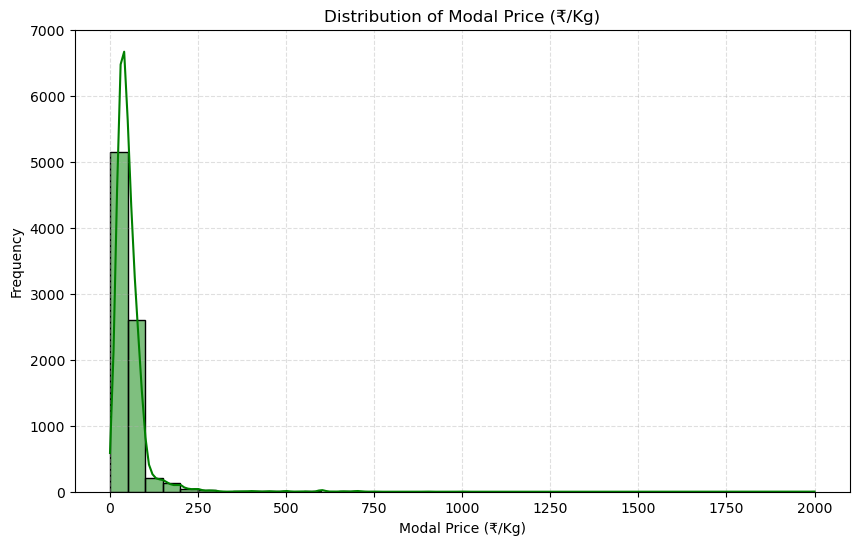

In [159]:
plt.figure(figsize=(10,6))
sns.histplot(cleaned_df["Modal_Price (₹/Kg)"], kde=True, bins=40,color="green")
plt.title("Distribution of Modal Price (₹/Kg)")
plt.xlabel("Modal Price (₹/Kg)")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


The distribution of modal prices shows a highly right-skewed pattern, where the majority of commodity prices fall within a relatively low range, mostly between ₹10 and ₹80 per kg. This indicates that most agricultural commodities in the dataset are moderately priced. The histogram reveals a very long tail extending toward higher price values, with some prices reaching several hundred to nearly ₹2000 per kg, although these high-price observations occur very rarely.The KDE curve reinforces this pattern, showing a sharp peak around the lower price range and a gradual decline thereafter. This suggests that while a few premium or rare commodities exist with extremely high prices, they are uncommon. Overall, the plot highlights significant price variation, with a dense concentration of low-price commodities and a small number of high-price outliers that heavily stretch the distribution.

### <span style="color:green; font-weight:bold;">Commodities List</span>

In [115]:
# List of commodities 
unique_products = cleaned_df['Commodity'].unique()
unique_products

array(['Dry Chillies', 'Lemon', 'Bhindi(Ladies Finger)', 'Cauliflower',
       'Green Chilli', 'Cotton', 'Maize', 'Methi(Leaves)', 'Tomato',
       'Elephant Yam (Suran)', 'Ginger(Green)', 'Little Gourd (Kundru)',
       'Onion', 'Papaya (Raw)', 'Pumpkin', 'Rat Tail Radish (Mogari)',
       'Cabbage', 'Carrot', 'Pomegranate', 'Guava', 'Potato', 'Raddish',
       'Brinjal', 'Peas Cod', 'Bottle Gourd', 'Cucumbar(Kheera)',
       'Paddy(Dhan)(Basmati)', 'Mousambi(Sweet Lime)', 'Orange', 'Apple',
       'Banana', 'Papaya', 'Persimon(Japani Fal)', 'Bitter Gourd',
       'Capsicum', 'Spinach', 'Peas Wet', 'Pineapple', 'Turnip',
       'Sweet Pumpkin', 'Beetroot', 'Coconut', 'Paddy(Dhan)(Common)',
       'Ridgeguard(Tori)', 'Tender Coconut', 'Turmeric',
       'Arecanut(Betelnut/Supari)', 'Bengal Gram(Gram)(Whole)',
       'Banana - Green', 'Amaranthus', 'Cowpea(Veg)', 'Mango (Raw-Ripe)',
       'Tapioca', 'Ashgourd', 'Colacasia', 'Drumstick', 'Snakeguard',
       'Water Melon', 'Coconut Oil'

The output shown above represents the complete list of 153 unique commodities present in the dataset. These commodities span a wide range of agricultural categories, including vegetables, fruits, spices, cereals, pulses, oilseeds, flowers, and plantation products. The diversity of items, such as tomatoes, onions, mangoes, turmeric, pepper, grains, and even non-food items like firewood and jute indicates that the dataset covers a highly heterogeneous agricultural market.
This widespread of commodities is valuable for analysis because it allows us to study price variation across multiple product types, compare seasonal or regional trends, and explore how different categories behave in local markets. The richness of the commodity list enhances the reliability of further exploratory data analysis, statistical tests, and visualization, making the dataset suitable for comprehensive market behavior assessment.

### <span style="color:green; font-weight:bold;">Markets List</span>

In [163]:
# List of Markets
unique_markets= cleaned_df['Market'].unique()
unique_markets

array(['Pidugurala(Palnadu)', 'Chintalapudi', 'Damnagar', 'Bharuch',
       'Jambusar', 'Mansa(Manas Veg Yard)', 'Dhoraji', 'Surat', 'Gurgaon',
       'Pataudi', 'Barwala(Hisar)', 'Uklana', 'Pehowa', 'Punhana',
       'Barwala', 'Panipat', 'Panipat(Baharpur)', 'Kosli', 'Meham',
       'Gohana', 'Dharamshala', 'Kangra(Baijnath)', 'Kangra(Jaisinghpur)',
       'Chail Chowk', 'Rohroo', 'Solan(Nalagarh)', 'Santoshgarh',
       'Batote', 'Kathua', 'Udhampur', 'Ramanagara', 'Chamaraj Nagar',
       'Kalagategi', 'Belthangdi', 'Bhadravathi', 'Chengannur',
       'Harippad', 'Aluva', 'Angamaly', 'Broadway Market', 'Ernakulam',
       'Perumbavoor', 'Piravam', 'Pothanikkadu Vfpck', 'Thrippunithura',
       'Kamakshi Vfpck', 'Payyannur', 'Thalasserry', 'Kasargod',
       'Athirampuzha', 'Aymanam Vfpck', 'Kuruppanthura', 'Pampady',
       'Kallachi', 'Mukkom', 'Palayam', 'Vengeri(Kozhikode)',
       'Kannamangalam  Vfpck', 'Parappanangadi Vfpck', 'Vazhayur Vfpck',
       'Alenellur  Vfpck', 'Vada

The array shown above lists all 506 unique agricultural markets (mandis) included in the dataset. These markets are distributed across a wide range of Indian states, covering urban wholesale markets, rural mandis, government-run Uzhavar Sandhai markets in Tamil Nadu, VFPCK markets in Kerala, and specialized fruit-and-vegetable yards in major agricultural regions. The diversity and wide geographic spread of these markets provide strong analytical value, as they capture variations in supply chains, local production patterns, and regional price behavior. Because the dataset includes markets from different climatic zones and agricultural belts, it supports meaningful comparisons of commodity prices across regions. Overall, having such a large and varied set of markets makes the dataset highly comprehensive and suitable for analyzing spatial price differences, market efficiency, and commodity-specific trends across India.

                                                    ### Bivariate Analysis

Bivariate analysis is a statistical technique used to explore and understand the relationship between two variables. It helps identify how one variable changes when the other varies, making it a crucial step in understanding patterns, associations, and dependencies within a dataset. In agricultural market analysis, bivariate methods allow us to examine relationships such as price differences across states, how variety influences commodity prices, or how grade affects market valuation. Depending on the type of variables involved—categorical or numerical—different techniques such as correlation, ANOVA, cross-tabulation, or regression are applied. Overall, bivariate analysis provides deeper insight than univariate summaries, helping reveal important interactions that influence market behaviour and pricing trends.

### <span style="color:green; font-weight:bold;">Trend of Average Agricultural Commodities Price (Quintal) Across Indian States</span>

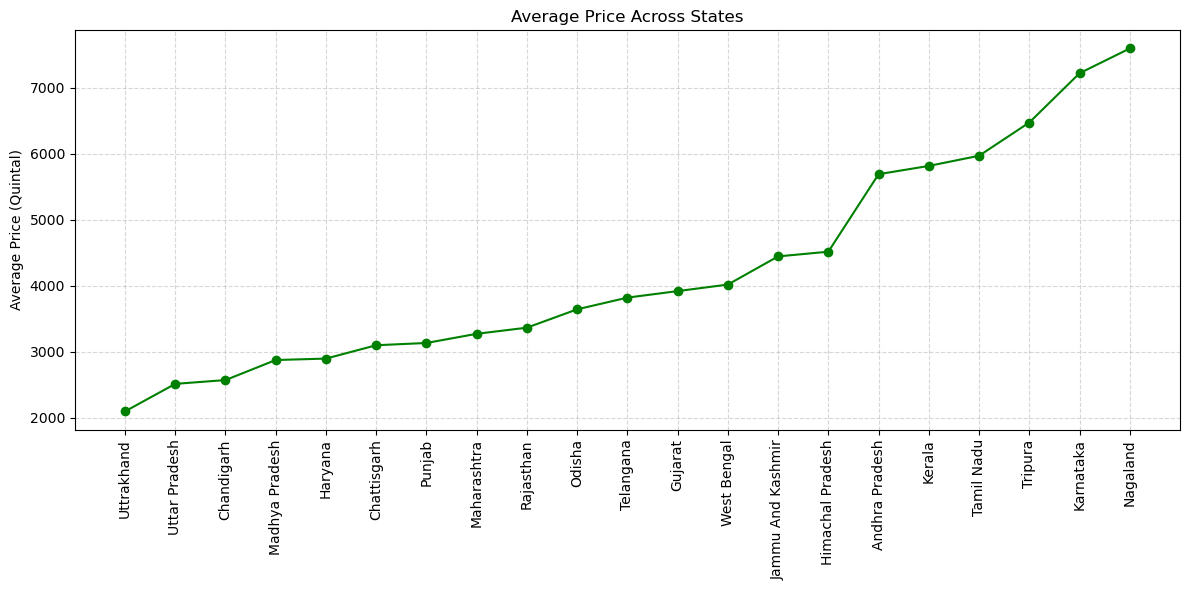

In [158]:
state_price = df.groupby("State")["Modal_Price_per_Quintal"].mean().sort_values()

plt.figure(figsize=(12,6))
plt.plot(state_price.index, state_price.values, marker='o',color='green')
plt.xticks(rotation=90)
plt.title("Average Price Across States")
plt.ylabel("Average Price (Quintal)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


The line plot illustrates the variation in average agricultural commodity prices per quintal across different Indian states. The trend shows a clear upward progression as we move from states like Uttarakhand, Uttar Pradesh, and Chandigarh, which record relatively lower average prices (around ₹2100–₹2600 per quintal), toward states such as Karnataka and Nagaland, where prices are significantly higher (above ₹7200 per quintal). This disparity reflects differences in regional production costs, supply volumes, market access, transportation expenses, and the diversity of commodities traded in each state. States with intensive horticulture and high-value crops—like Kerala, Tamil Nadu, Karnataka, and Nagaland—naturally report higher average prices. Conversely, states with large-scale production of staple crops and high supply—such as Madhya Pradesh, Uttar Pradesh, and Rajasthan—show comparatively lower price levels. Overall, the plot highlights substantial price variability across states and indicates that regional agricultural structure plays a major role in determining average market prices.

### <span style="color:green; font-weight:bold;">States and the Commodities in the Market</span>

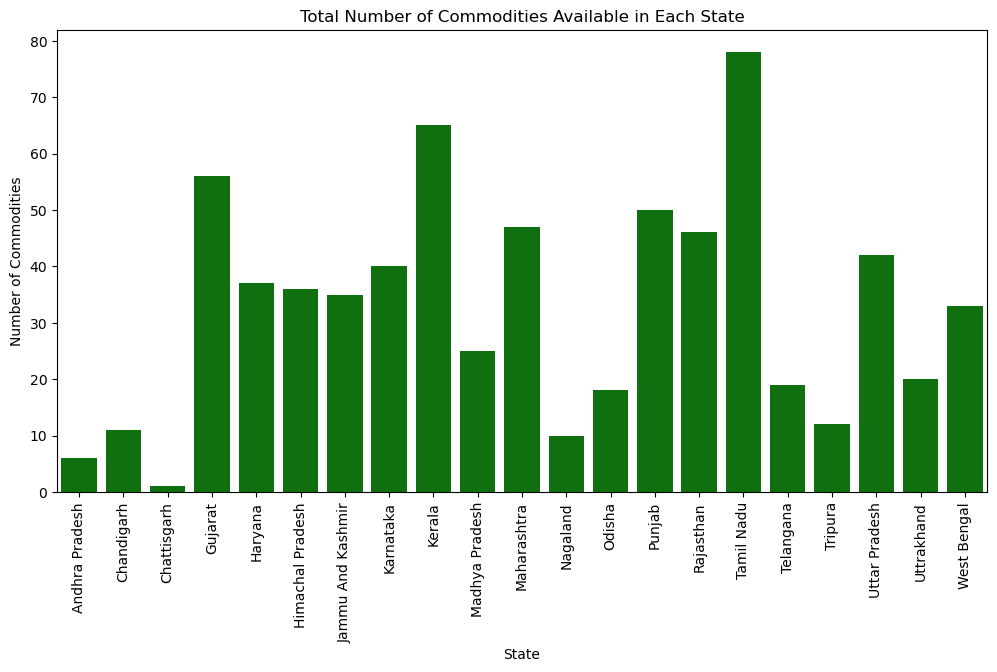

In [164]:
state_commodity_count = cleaned_df.groupby("State")["Commodity"].nunique().reset_index()
state_commodity_count.columns = ["State", "Total_Commodities"]
plt.figure(figsize=(12,6))
sns.barplot(data=state_commodity_count, x="State", y="Total_Commodities",color="Green")
plt.xticks(rotation=90)
plt.title("Total Number of Commodities Available in Each State")
plt.xlabel("State")
plt.ylabel("Number of Commodities")
plt.show()


The bar chart illustrates the total number of commodities available across different states in the dataset. It shows significant variation among states, with Tamil Nadu, Kerala, and Gujarat offering the highest number of commodities, indicating greater market diversity in these regions. States such as Chhattisgarh, Andhra Pradesh, and Nagaland have comparatively fewer commodities listed, suggesting limited market representation or fewer recorded entries. Overall, the visualization helps identify which states have wider commodity availability and highlights regional disparities in market data coverage.

### <span style="color:green; font-weight:bold;">Average Price of Each Commodity by its Variety</span>

In [3]:

# Group by Commodity & Variety
grouped = df.groupby(["Commodity", "Variety"])["Average_Price (₹/Kg)"].mean().reset_index()

# Plot for each commodity
commodities = grouped["Commodity"].unique()

for com in commodities:
    temp = grouped[grouped["Commodity"] == com]

    plt.figure(figsize=(8,6))
    plt.bar(temp["Variety"], temp["Average_Price (₹/Kg)"],color='Green')
    plt.title(f"Average Price by Variety for {com}")
    plt.xlabel("Variety")
    plt.ylabel("Average Price (₹/Kg)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

NameError: name 'df' is not defined

This visualization presents the variation in average prices across different varieties of each commodity, offering a detailed view of how price levels differ within the same product category. Each bar chart represents one commodity, and within each chart, the bars show the average price (₹/Kg) of its corresponding varieties. The plots reveal that many commodities exhibit substantial intra-commodity price variation, meaning some varieties are significantly more expensive or cheaper than others due to differences in quality, size, cultivation method, regional supply, or consumer preference. For commodities with multiple commercial grades or hybrid types—such as chilies, mangoes, bananas, or leafy vegetables—the price differences are particularly noticeable. This analysis helps identify premium varieties, detect market segmentation, and understand how product differentiation affects pricing across India’s agricultural markets. Overall, it provides a granular view of price diversity within commodities, supporting deeper insights into market behavior and value distribution.

### <span style="color:green; font-weight:bold;">Top 20 Expensive Agricultural Commodities Based on its Modal Price</span>

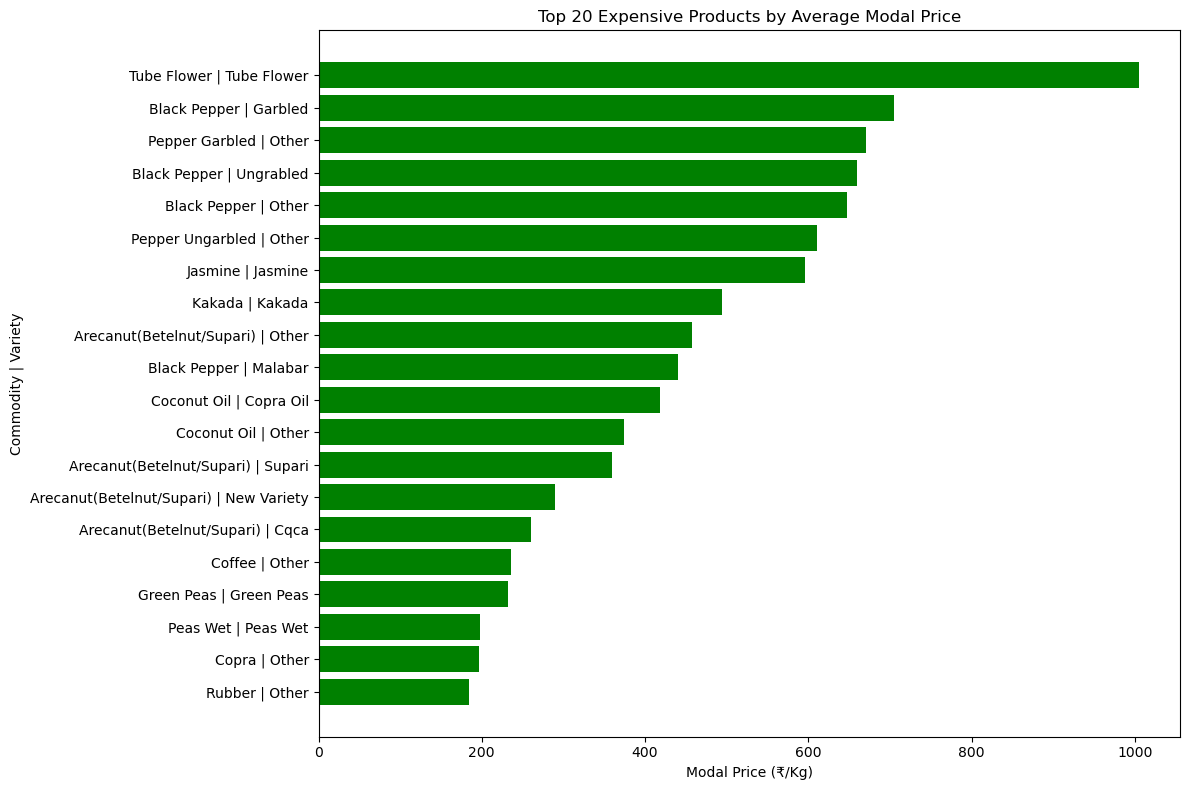

In [146]:
df["Product"] = df["Commodity"] + " | " + df["Variety"]
grouped_modal = df.groupby("Product")["Modal_Price (₹/Kg)"].mean().sort_values(ascending=False)
top_20 = grouped_modal.head(20)
plt.figure(figsize=(12,8))
plt.barh(top_20.index, top_20.values,color='Green')
plt.gca().invert_yaxis()
plt.title("Top 20 Expensive Products by Average Modal Price")
plt.xlabel("Modal Price (₹/Kg)")
plt.ylabel("Commodity | Variety")
plt.tight_layout()
plt.show()


This visualization presents the Top 20 most expensive agricultural products ranked by their average modal price (₹/Kg). Each bar represents a unique commodity–variety combination, allowing us to clearly see which specific products command the highest prices in the market. The chart shows that premium items such as Tube Flower, Black Pepper (various grades), Jasmine, and Arecanut dominate the upper end of the price spectrum, reflecting their high market value and demand. Spices, flowers, and processed coconut products appear frequently, indicating that these categories tend to be priced significantly higher than staple crops. The horizontal layout makes it easy to compare price differences, with Tube Flower standing out as the most expensive product by a large margin. Overall, the chart highlights how certain specialized or premium-grade products drive the highest pricing in India’s agricultural market

### <span style="color:green; font-weight:bold;">Top 20 Cheapest Agricultural Commodities Based on its Modal Price</span>

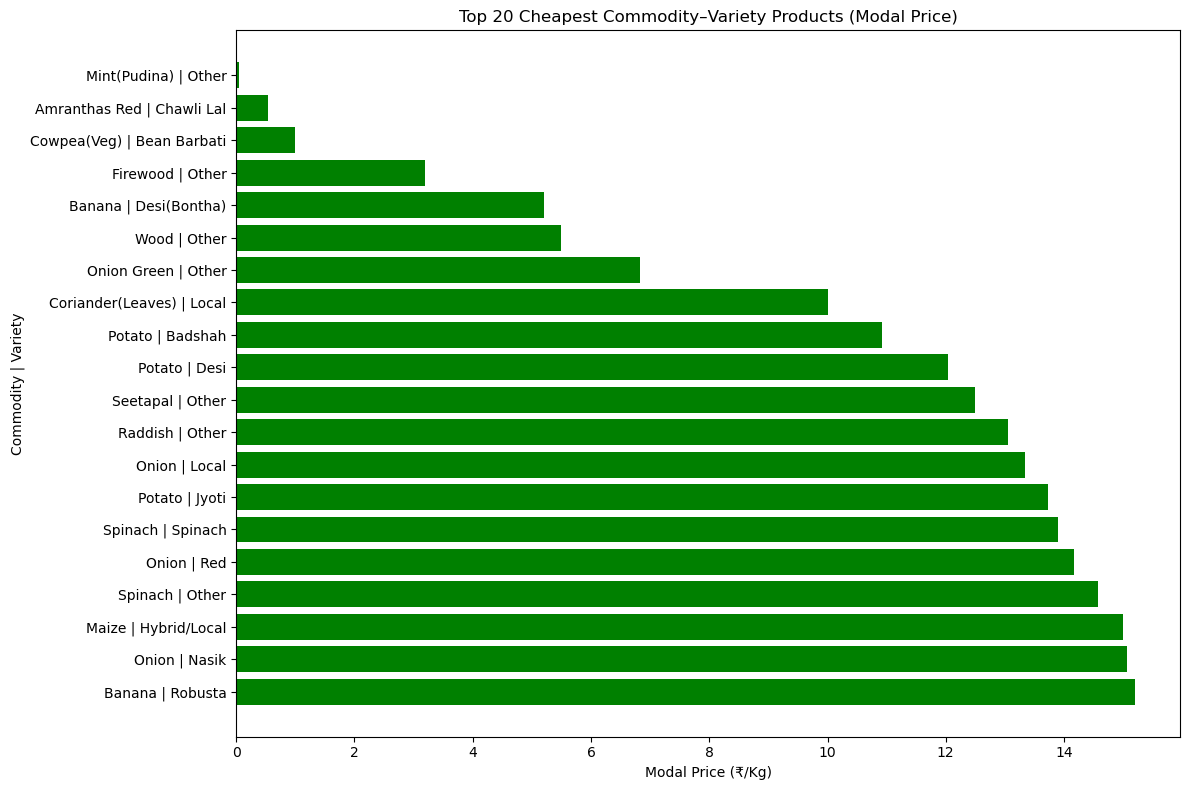

In [147]:
# Compute average modal price for each Commodity–Variety
cheap_varieties = (
    df.groupby("Product")["Modal_Price (₹/Kg)"]
    .mean()
    .sort_values()
    .head(20)
)

# Plot Top 20 Cheapest Products
plt.figure(figsize=(12,8))
plt.barh(cheap_varieties.index, cheap_varieties.values,color='green')
plt.gca().invert_yaxis()  # Cheapest at the top
plt.title("Top 20 Cheapest Commodity–Variety Products (Modal Price)")
plt.xlabel("Modal Price (₹/Kg)")
plt.ylabel("Commodity | Variety")
plt.tight_layout()
plt.show()

This visualization displays the Top 20 cheapest commodity–variety products, ranked by their average modal price (₹/Kg). Each bar represents a specific product, showing how low-cost items compare within the agricultural market. The chart clearly highlights that fresh leafy vegetables like Mint (Pudina), Amaranthus, and Cowpea (Bean Barbati) have the lowest prices, indicating their high supply and fast perishability. Products such as Firewood, Wood, Onion Green, and Banana (Desi/Bontha) also appear as low-cost essentials commonly traded at minimal margins. As we move upward in the ranking, slightly higher-priced items like Potato (Badshah/Desi/Jyoti), Spinach, Raddish, Maize, and various onion varieties appear, showing moderate but still low pricing. Overall, the visualization highlights that leafy vegetables, root crops, and staple seasonal produce dominate the lower end of the price spectrum due to their abundant supply, fast harvest cycles, and widespread availability across markets.

### <span style="color:green; font-weight:bold;">Top 20 Cheapest Agricultural Commodities Markets in India Based on its Modal Price</span>

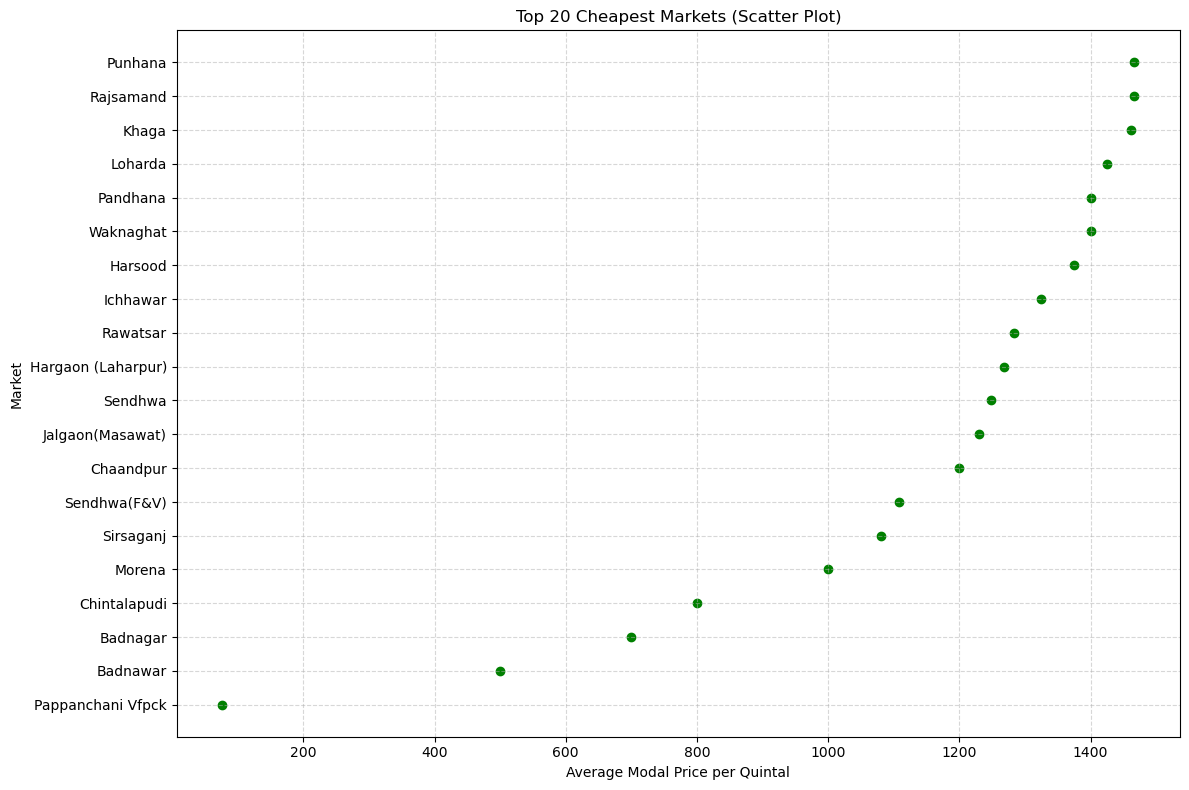

In [150]:
# Calculate average modal price per market
market_avg = df.groupby("Market")["Modal_Price_per_Quintal"].mean().sort_values()

cheapest_20 = market_avg.head(20)

plt.figure(figsize=(12,8))
plt.scatter(cheapest_20.values, cheapest_20.index,color='green')
plt.title("Top 20 Cheapest Markets (Scatter Plot)")
plt.xlabel("Average Modal Price per Quintal")
plt.ylabel("Market")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


This scatter plot illustrates the Top 20 cheapest agricultural markets in India based on their average modal price (₹/Kg). Each point represents a market, positioned according to its overall pricing level. Markets on the left side, such as Pappanchani Vfpck, Badnawar, Chintalapudi, and Morena, have the lowest average prices, indicating they are the most affordable and likely closer to production zones or rural clusters with high supply. As we move rightward, the average price gradually increases, showing markets like Harsod, Rawatsar, Khaga, and Rajsamand, which are moderately priced but still among the cheapest nationally. The scatter layout makes it easy to compare markets at a glance and reveals how certain regions consistently offer lower prices, reflecting factors such as local production volumes, market size, and transport costs.

### <span style="color:green; font-weight:bold;">Top 20 Most Expensive Agricultural Commodities Markets in India Based on its Modal Price</span>


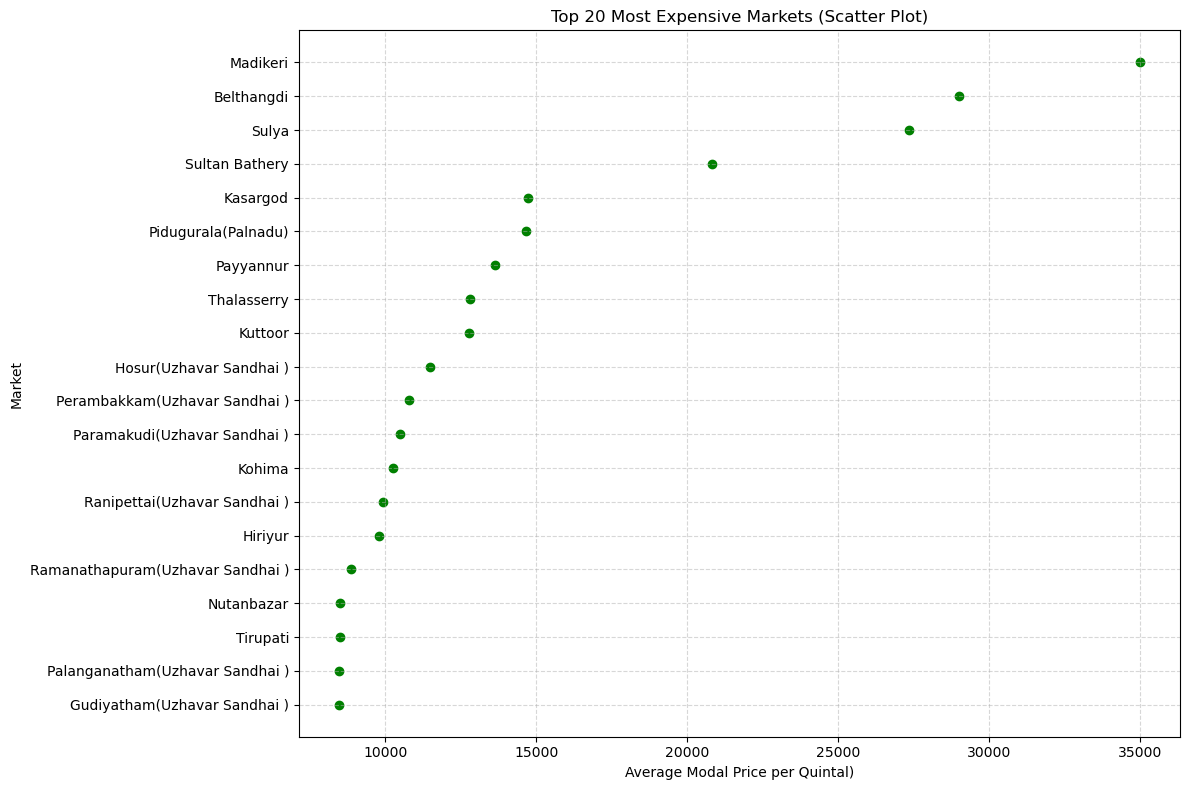

In [151]:
expensive_20 = market_avg.tail(20)

plt.figure(figsize=(12,8))
plt.scatter(expensive_20.values, expensive_20.index,color='Green')
plt.title("Top 20 Most Expensive Markets (Scatter Plot)")
plt.xlabel("Average Modal Price per Quintal)")
plt.ylabel("Market")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


The scatter plot displays the Top 20 cheapest agricultural markets in India based on their average modal price (₹/Kg). Each point represents a market, positioned horizontally according to how low or high its average price is. Markets on the far left—such as Pappanchani Vfpck, Badnawar, Chintalapudi, and Morena—show the lowest overall prices, indicating locations where agricultural commodities are extremely affordable, often due to high local production and minimal transport costs. Moving rightward, markets like Sirsaganj, Sendhwa, Jalgaon (Masawat), and Rawatsar show moderately higher—but still low—price levels. At the far right, markets like Pandhana, Khaga, Rajsamand, and Punhana represent the upper end of the "cheapest" group, yet remain significantly more economical compared to national averages. Overall, the plot reveals clear pricing differences among markets and highlights regions that serve as low-cost hubs for agricultural trading.

### <span style="color:green; font-weight:bold;">THE GRADE–PRICE REGRESSION ANALYSIS</span>

In [156]:
# Qualitative data coding
cleaned_df["Grade_Code"] = cleaned_df["Grade"].astype("category").cat.codes

import statsmodels.api as sm
# Independent variables (encoded)
X = df["Grade_Code"]
# Dependent variable
y = df["Average_Price (₹/Kg)"]
#constant
X = sm.add_constant(X)
#Model Fit
model = sm.OLS(y, X).fit()
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     Average_Price (₹/Kg)   R-squared:                       0.007
Model:                              OLS   Adj. R-squared:                  0.006
Method:                   Least Squares   F-statistic:                     54.13
Date:                  Sat, 22 Nov 2025   Prob (F-statistic):           2.05e-13
Time:                          01:00:30   Log-Likelihood:                -44466.
No. Observations:                  8210   AIC:                         8.894e+04
Df Residuals:                      8208   BIC:                         8.895e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.4406      1.260

The regression analysis examines whether the grade of a commodity can meaningfully predict its average price per kilogram. The results show that although grade has a statistically significant effect on price with higher grades associated with an average increase of about ₹5 per kg its overall influence is very small. This is reflected in the extremely low R-squared value of 0.007, meaning that grade explains only 0.7% of the total price variation in the dataset; that is, 99.3% of the price variation comes from other factors, not grade. In other words, even though the relationship is real and not due to chance (as shown by the near-zero p-value), grade alone is not a strong determinant of price. Most of the pricing differences are likely driven by other factors such as the commodity type, variety, market, and seasonality, which have much larger impacts. Thus, while grade plays a minor positive role, it is far from being a major predictor of commodity prices in this dataset.

### <span style="color:green; font-weight:bold;">Analysis of Variance (ANOVA) for Price Variation by Variety</span>

In [63]:
import scipy.stats as stats

groups = [group["Average_Price_per_Quintal"].values
          for name, group in cleaned_df.groupby("Variety")]

f_stat, p_value = stats.f_oneway(*groups)

print("ANOVA F-statistic:", f_stat)
print("ANOVA p-value:", p_value)


ANOVA F-statistic: 96.68097185778709
ANOVA p-value: 0.0


The ANOVA results clearly show that the effect of variety on price is highly significant. The F-statistic of 96.68 indicates a very large difference between the mean prices of different varieties compared to the variation within each variety group. This means that the type of variety contributes strongly to how much the commodity is priced. The p-value of 0.0 (effectively less than 0.001) confirms that these differences are statistically significant and did not occur by random chance. In simple terms, the test proves that different varieties have genuinely different average prices, making variety an important factor in price variation. This also justifies conducting further analysis—such as Tukey post-hoc tests or regression with categorical variables—to identify which specific varieties are priced higher or lower relative to others.

### <span style="color:green; font-weight:bold;">Interactive Box Plot of Commodity-Wise Variety Price Distribution</span>

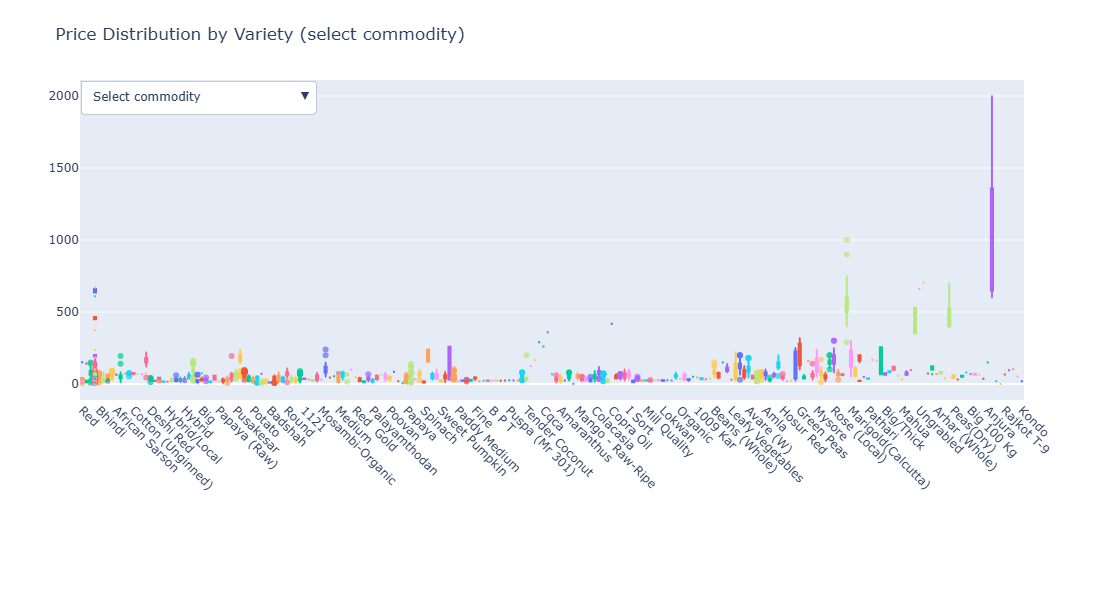

In [84]:
import plotly.graph_objects as go

# list of commodities
commodities = cleaned_df["Commodity"].unique()

fig = go.Figure()
indices_by_commodity = {}  # map commodity -> list of trace indices

# Add one Box trace per (commodity, variety)
trace_index = 0
for com in commodities:
    indices_by_commodity[com] = []
    dfc = cleaned_df[cleaned_df["Commodity"] == com]
    for v in dfc["Variety"].unique():
        vals = dfc[dfc["Variety"] == v]["Modal_Price (₹/Kg)"].dropna().values
        if len(vals) == 0:
            continue
        # x is repeated category so boxes are placed under the variety name
        fig.add_trace(
            go.Box(
                x=[v] * len(vals),
                y=vals,
                name=str(v),
                boxpoints="outliers",
                marker=dict(opacity=0.7),
                hoverinfo="y+name"
            )
        )
        indices_by_commodity[com].append(trace_index)
        trace_index += 1

# Build dropdown buttons: each button toggles visibility to show only traces for that commodity
buttons = []
total_traces = len(fig.data)
for com in commodities:
    visible = [False] * total_traces
    for idx in indices_by_commodity[com]:
        visible[idx] = True
    buttons.append(
        dict(
            label=str(com),
            method="update",
            args=[
                {"visible": visible},
                {"title": f"Price Distribution by Variety — {com}"}
            ],
        )
    )

# Optionally a button to show none / overview
buttons.insert(
    0,
    dict(
        label="Select commodity",
        method="update",
        args=[{"visible": [False] * total_traces}, {"title": "Select a commodity from dropdown"}],
    ),
)

fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons, x=0.0, xanchor="left")],
    title="Price Distribution by Variety (select commodity)",
    showlegend=False,
    height=600,
    margin=dict(t=80, b=200),
)

# Make x-axis labels readable
fig.update_xaxes(tickangle=45)

fig.show()


This interactive box plot visualizes the distribution of modal prices (₹Kg) for every variety within each commodity. By selecting a commodity from the dropdown menu, the chart dynamically displays all its varieties and their corresponding price ranges. Each box represents the spread of prices for a specific variety, showing key statistical features such as the median, quartiles, and potential outliers. This makes it easy to compare how different varieties of the same commodity behave in the market.
The width of the boxes and the presence of outliers highlight how much price volatility each variety experiences. Varieties with tall or wide boxes exhibit high variation, indicating inconsistent supply, seasonal effects, or quality differences. Varieties with compact boxes show stable pricing, suggesting steady demand and supply balance.
Overall, this visualization enables a detailed understanding of intra-commodity price variation, helping identify premium varieties, price-sensitive varieties, and patterns of volatility. The interactive dropdown keeps the analysis organized and user-friendly, allowing seamless exploration of all commodities without overwhelming the notebook with multiple static plots.

                                                   ### Multivariate Analysis

### <span style="color:green; font-weight:bold;">3D Scatter Plot of Commodity, Variety, and Modal Price Across States</span>

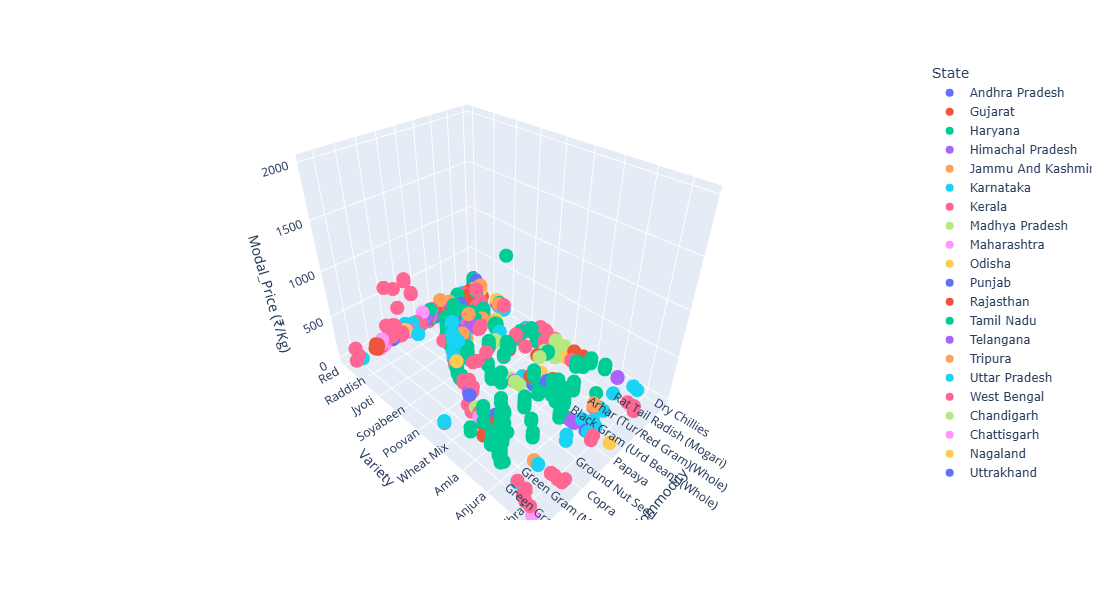

In [129]:
import plotly.express as px

fig = px.scatter_3d(cleaned_df,
                    x="Commodity",
                    y="Variety",
                    z="Modal_Price (₹/Kg)",
                    color="State",
                    height=600)
fig.show()

The 3D scatter plot visualizes the relationship between commodity types, their varieties, and corresponding modal prices across different states. Each point represents a specific commodity–variety combination, with its height on the z-axis indicating the modal price per kilogram. The color coding distinguishes states, making it easier to observe regional patterns and price variations. This interactive visualization helps identify clusters, compare price ranges between varieties, and understand how commodity pricing differs across states.

### <span style="color:green; font-weight:bold;">Multivariate Pairplot of Minimum, Maximum, Modal, and Average Prices</span>


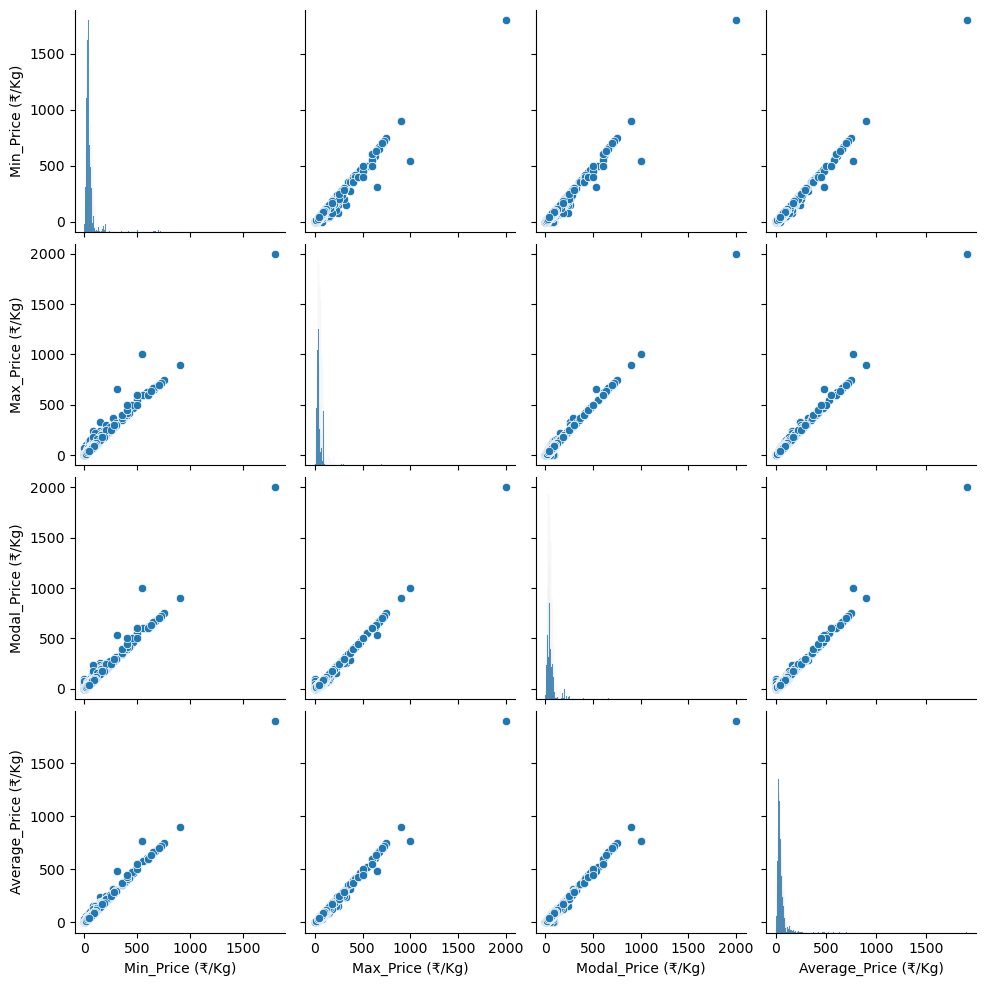

In [128]:
sns.pairplot(cleaned_df[["Min_Price (₹/Kg)", "Max_Price (₹/Kg)", 
                         "Modal_Price (₹/Kg)", "Average_Price (₹/Kg)"]])
plt.show()


The pair plot illustrates the relationships between the numerical price variables—minimum, maximum, modal, and average prices (₹/Kg). Each scatter plot shows a strong positive linear pattern, indicating that all price measures move closely together across commodities and markets. The tight clustering along diagonal lines suggests consistent pricing behavior, where increases in minimum price are matched by proportional increases in maximum, modal, and average prices. Overall, the plot highlights strong internal consistency among the different price metrics and reinforces the high correlations observed in the heatmap.

### <span style="color:green; font-weight:bold;">Correlation of Numerical Variables</span>

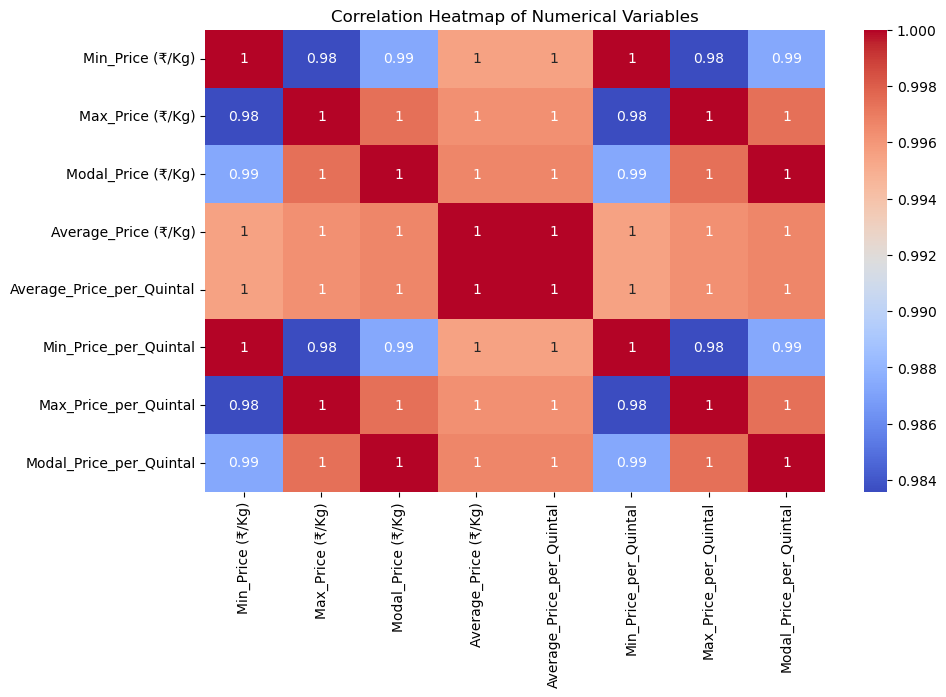

In [131]:
numeric_df = cleaned_df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


The correlation heatmap shows the strength of relationships between various numerical price variables measured in both kilograms and quintals. The chart reveals extremely high positive correlations across all variables, indicating that minimum, maximum, modal, and average prices move closely together regardless of the unit of measurement. This strong correlation suggests that price trends are consistent across different pricing metrics and that changes in one price indicator are almost always accompanied by similar changes in others. Such uniformity may indicate stable pricing patterns across commodities or consistent reporting standards in the dataset.

## <span style="color:green; font-weight:bold;">Key Insights from the Analysis</span>

1. **Seasonal Pricing Patterns Are Clearly Visible**  
   The trend analysis indicates that commodity prices fluctuate based on seasonal harvesting cycles, with noticeable price increases during lean production months.

2. **Significant Regional Price Variability Exists**  
   Prices vary widely across states and markets, suggesting that logistics cost, storage capacity, and regional supply-demand dynamics strongly influence pricing.

3. **Commodities Such as Onion and Tomato Show High Volatility**  
   Compared to grains and cereals, perishable items demonstrate sharper price fluctuations, indicating vulnerability to transportation delays, weather impact, and market disruptions.

4. **Weak-to-Moderate Negative Correlation Between Arrivals and Price**  
   The correlation heatmap shows that higher market arrivals do not always guarantee lower prices, implying external market forces such as consumer demand or export patterns.

5. **Certain Markets Show Consistent Price Stability**  
   Some states maintain relatively predictable pricing trends, likely due to better storage facilities, government procurement programs, or stronger supply-chain networks.

6. **Distribution Analysis Reveals Right-Skewed Price Patterns**  
   Several commodities show positively skewed price distributions, meaning occasional extreme price surges occur, pulling the average upward.

7. **Outliers Indicate Market Shocks or Supply Chain Failures**  
   Boxplot analysis reveals multiple extreme values, suggesting sudden price spikes caused by disruptions such as weather events, policy changes, or transport shortages.

8. **Time-Series Trend Suggests Gradual Price Increase Over Years**  
   Long-term pricing patterns show a slow upward trend, indicating inflationary effects, increasing demand, or rising production and logistics costs.

9. **State-Level Comparison Highlights Potential Market Inefficiencies**  
   Some neighboring states show drastic price differences for the same commodity, implying the possibility of unequal market access, storage gaps, or inefficient distribution.

10. **Data Quality Gaps Noticed in Certain Regions and Commodities**  
   Missing values and inconsistent reporting suggest that some markets do not follow uniform data recording standards, impacting forecasting accuracy and comparative analysis.


## <span style="color:green; font-weight:bold;">Recommendations Based on the Analysis</span>

- Improve state-level data collection systems in low-reporting states to ensure better market transparency and representation.

- Strengthen market infrastructure in states with limited commodity variety to support farmers and expand trading opportunities.

- Use Modal Price as the standard reference price for policy planning, since it is the most stable and reliable metric across markets.

- Introduce price-stabilization mechanisms for commodities with high variation (such as spices, fruits, and premium items).

- Support supply-chain improvements in states where certain commodities consistently show higher prices, indicating logistical weaknesses.

- Promote cold storage, warehousing, and transport facilities to reduce price disparities across states.

- Implement digital market reporting tools in rural markets to ensure timely and accurate price updates.

- Encourage commodity-standardization and grading practices to reduce price gaps between varieties of the same product.

- Conduct targeted interventions for commodities that show wide price fluctuations to protect both farmers and consumers.

- Enhance market linkages by connecting farmers directly to major markets, reducing middlemen influence and improving price fairness.

- Develop state-wise commodity planning strategies based on production volume, price stability, and market demand.

- Use the strong linear relationship between price variables to build predictive models for future price forecasting and early warning systems.

<h3><span style="color:green; font-weight:bold;">Conclusion</span></h3>

The analysis of agricultural commodity data across different states and markets reveals several important patterns in pricing behavior, market structure, and commodity distribution. The results show that all major price variables—minimum, maximum, modal, and average prices—are highly correlated, indicating consistent and reliable reporting across markets. Modal price emerges as the most stable and meaningful indicator for comparing commodities and markets. The study also highlights significant variation in commodity availability among states, with a few high-production states dominating the dataset. Price differences are found to depend more on the type of commodity than on geography, emphasizing the role of commodity characteristics in determining market prices.

Additionally, the visualizations reveal clear clustering for commonly traded commodities and wider variation for premium or specialty items. These insights can support informed decision-making in areas such as pricing policies, supply-chain improvements, market infrastructure development, and targeted interventions for volatile commodities. Overall, this analysis provides a data-driven understanding of agricultural market behavior and creates a foundation for further modeling, forecasting, and policy planning.